<a href="https://colab.research.google.com/github/cjdevx-ai/Neural-Network-Lessons/blob/main/LabFrameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with PyTorch/TensorFlow

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

## Part 1: Iris Classification

Iris Dataset contains 150 records of 3 different classes of irises. Each record contains 4 numeric parameters: sepal length/width and petal length/width. It is an example of a simple dataset, for which you do not need a powerful neural network.

### Getting the Dataset

Iris dataset is build into Scikit Learn, so we can easily get it:

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
features = iris['data']
labels = iris['target']
class_names = iris['target_names']
feature_names = iris['feature_names']

print(f"Features: {feature_names}, Classes: {class_names}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], Classes: ['setosa' 'versicolor' 'virginica']


### Visualize the Data

In many cases, it makes sense to visualize the data to see if they look separable - it would assure us that we should be able to build good classification model. Because we have a few features, we can build a series of pairwise 2D scatter plots, showing different classes by different dot colors. This can be automatically done by a package called **seaborn**:

In [2]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(features,columns=feature_names).join(pd.DataFrame(labels,columns=['Label']))

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
print(pd.unique(df['Label']))

[0 1 2]


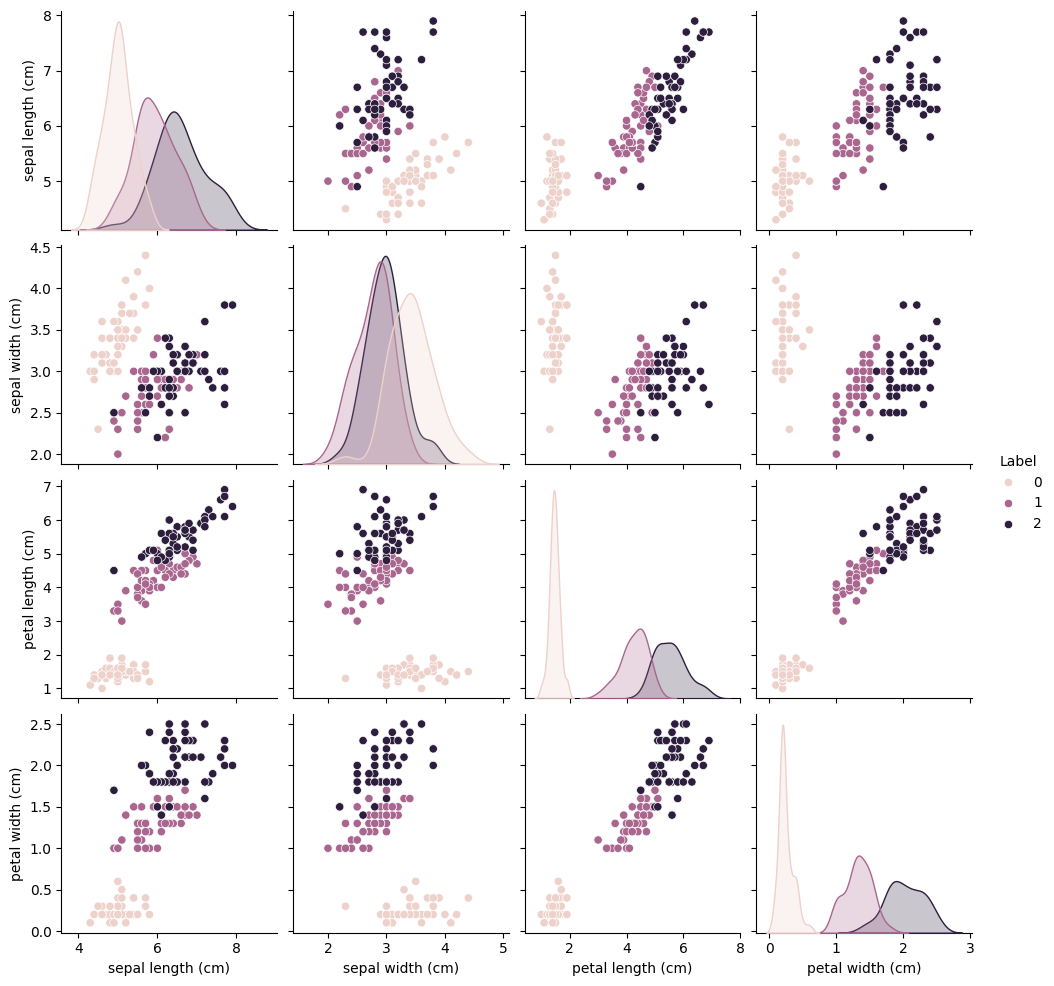

In [4]:
sns.pairplot(df,hue='Label')

### Normalize and Encode the Data

To prepare data to neural network training, we need to normalize inputs in the range [0..1]. This can be done either using plain `numpy` operations, or [Scikit Learn methods](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html).

Also, you need to decide if you want target label to be one-hot encoded or not. PyTorch and TensorFlow allow you feed in class number either as an integer (from 0 to N-1), or as one-hot encoded vector. When creating neural network structure, you need to specify loss function accordingly (eg. *sparse categorical crossentropy* for numeric representation, and *crossentropy loss* for one-hot encoding). One-hot encoding can also be [done using Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), or by using this piece of code:

```python
n_values = np.max(labels) + 1
labels_onehot = np.eye(n_values)[labels]
```

In [5]:
# Code to normalize and encode the data
import numpy as np

n_values = np.max(labels) + 1
labels_onehot = np.eye(n_values)[labels]

In [6]:
print("One-hot shape:", labels_onehot.shape)
print("First 5 one-hot rows:\n", labels_onehot[:5])

One-hot shape: (150, 3)
First 5 one-hot rows:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Split the Data into Train and Test

Since we do not have separate train and test dataset, we need to split it intro train and test dataset [using Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [7]:
# Split the data


X_train, X_test, y_train, y_test = train_test_split(features, labels_onehot, test_size=0.33, random_state=42)

### Define and Train Neural Network

Now you are ready to go, import your preferred framework, define the neural network and start training, observing the behavior of train and validation accuracy.

In [8]:
# Define the network
import tensorflow as tf
from tensorflow.keras import layers, models, Input

model = models.Sequential([
    Input(shape=(4,)),                 # Explicit input layer
    layers.Dense(10, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',   # not sparse
              metrics=['accuracy'])

In [9]:
# Train the network

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.3209 - loss: 2.0115 - val_accuracy: 0.3800 - val_loss: 1.7989
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2990 - loss: 1.8972 - val_accuracy: 0.3800 - val_loss: 1.6645
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2875 - loss: 1.8119 - val_accuracy: 0.3800 - val_loss: 1.5547
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3198 - loss: 1.6226 - val_accuracy: 0.3800 - val_loss: 1.4717
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2928 - loss: 1.5693 - val_accuracy: 0.3800 - val_loss: 1.4075
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3136 - loss: 1.4646 - val_accuracy: 0.3400 - val_loss: 1.3608
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3085 - loss: 1.3954 - val_accuracy: 0.2800 - val_loss: 1.3244
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3111 - loss: 1.3152 - val_accuracy: 0.2600 - val_loss: 1.2937


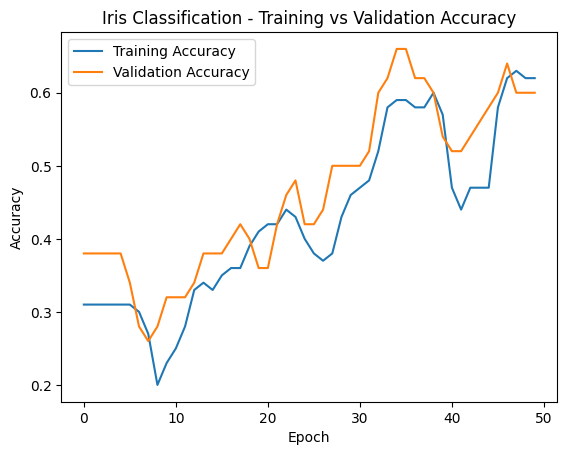

In [10]:
# Visualize train/validation accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Iris Classification - Training vs Validation Accuracy")
plt.show()

### Experiment

Now you can experiment with different network architectures to see how it affects the result. Try:
1. One-layer network with 3 neurons (equal to the number of classes)
1. Two-layer network with small/medium/large hidden layer
1. Using more layers

Make sure you observe overfitting when you are using rich model with lots of neurons (parameters).

In [11]:
# Experiment

# added a few more layers - this increases the total neurons
model = models.Sequential([
    Input(shape=(4,)),                 # Explicit input layer
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',   # not sparse
              metrics=['accuracy'])


In [12]:
# Train the network

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3068 - loss: 1.1015 - val_accuracy: 0.3200 - val_loss: 1.0752
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3558 - loss: 1.0561 - val_accuracy: 0.3200 - val_loss: 1.0606
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3725 - loss: 1.0300 - val_accuracy: 0.3200 - val_loss: 1.0381
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3141 - loss: 1.0314 - val_accuracy: 0.3200 - val_loss: 1.0202
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3982 - loss: 1.0120 - val_accuracy: 0.5000 - val_loss: 0.9819
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5023 - loss: 0.9598 - val_accuracy: 0.3200 - val_loss: 0.9447
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3600 - loss: 0.9245 - val_accuracy: 0.3200 - val_loss: 0.9202
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3391 - loss: 0.9045 - val_accuracy: 0.3200 - val_loss: 0.8947

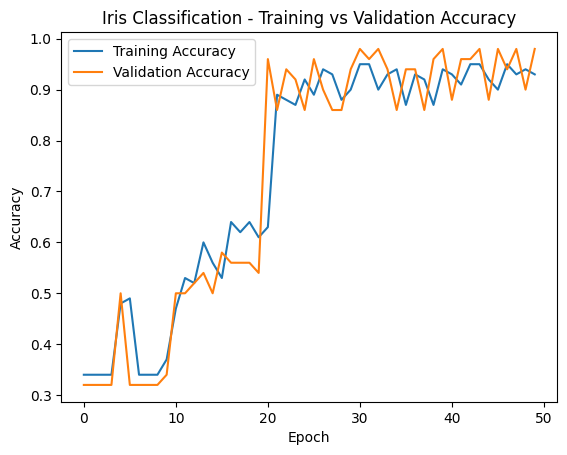

In [13]:
# Visualize train/validation accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Iris Classification - Training vs Validation Accuracy")
plt.show()

The learning stopped aroudn `20 epochs`, training longer doesn’t add much value (just small noise-like fluctuations).

What I did is that I added a lot of neurons in the network model structure, this allows the model to train better around the data. This resulted in an increased accuracy from `0.6000` to `0.9800`

To improve this model, try using a larger dataset, the current iris dataset is very small.

### EXPORT THE MODEL

In [14]:
# Save the model
model.save("iris_model.h5")   # HDF5 format

# Later, load the model
from tensorflow.keras.models import load_model
loaded_model = load_model("iris_model.h5")

# Check it's working
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Restored model accuracy: {acc:.4f}")

Restored model accuracy: 0.9800


In [15]:
# Download the model

from google.colab import files
files.download("iris_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Test the Model

In [19]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



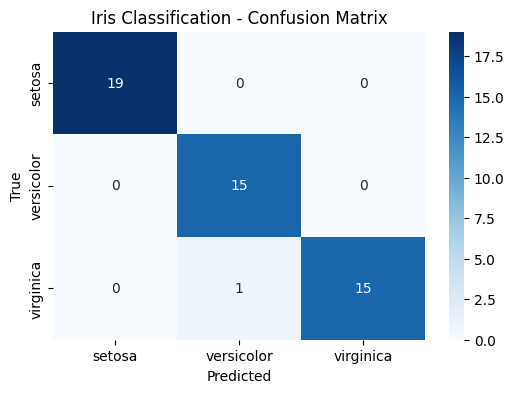

In [22]:
# Ensure y_test is in integer format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # one-hot encoded
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_int, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test_int, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Iris Classification - Confusion Matrix")
plt.show()


In [30]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Reload iris and fit scaler
iris = load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
scaler.fit(X)   # Fit on the full dataset (same as before)

# Example custom input: [sepal_length, sepal_width, petal_length, petal_width]
custom_sample = np.array([[5.1, 3.5, 1.4, 0.2]])   # looks like Setosa

# Scale it (same scaler as training)
custom_sample = scaler.transform(custom_sample)

# Predict
pred_class = np.argmax(model.predict(custom_sample), axis=1)[0]
print(f"🌸 Predicted class: {iris.target_names[pred_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
🌸 Predicted class: setosa


## Part 2: MNIST Training

Both Keras and PyTorch contain MNIST as built-in dataset, so you can easily get it with a couple of lines of code ([Keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/datasets.html)). You will also be able to load both train and test datasets without manually splitting them.

In [ ]:
# Load the dataset

Now you need to perform the steps above to make sure dataset is normalized (it would probably already be), defining and training a neural network.

## Takeaway

1. Neural networks can be used for traditional machine learning tasks. However, they are in many cases too powerful, and can cause overfitting.
1. It is important in this assignment that you observe the overfitting behavior, and try to avoid it.
1. With frameworks like Keras, sometimes training a neural network is quite straightforward. But you need to understand what goes on.